In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2]
y = dataset.iloc[:, 2]

In [21]:
from sklearn.preprocessing import StandardScaler
scalar_x = StandardScaler()
scalar_y = StandardScaler()
X = scalar_x.fit_transform(X)
y = scalar_y.fit_transform(np.array(y).reshape(-1,1))

In [22]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X,y)

/Users/rkumar/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
scalar_y.inverse_transform(regressor.predict(scalar_x.transform([[6.5]])))

array([170370.0204065])

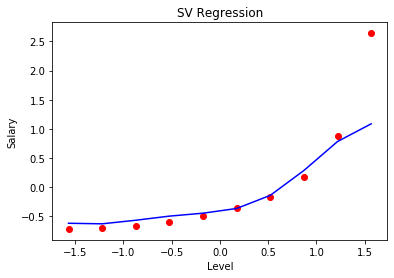

In [24]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('SV Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [25]:
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))